
The Ant has started it's journey!


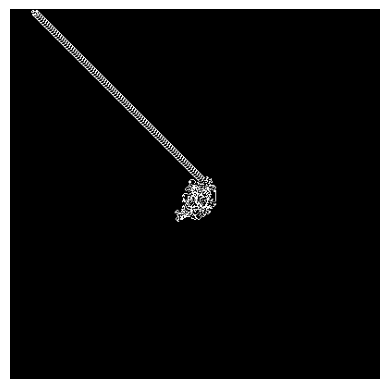

The Ant has completed it's journey!



In [96]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import output

# declaring colors for pixel coloring and getting user input
basic_colors = {'black':[0, 0, 0], 'white':[255, 255, 255], 'red':[255, 0, 0],
                'green':[0, 128, 0], 'yellow':[255, 255, 0], 'blue':[0, 0, 255],
                'pink':[255, 20, 147], 'gray':[128, 128, 128], 'brown':[139, 69, 19],
                'orange':[255, 140, 0], 'purple':[128, 0, 128]}

bounds = list()

print("Welcome to Langton's Ant Formicory!")
print("Please select the size of the formicory. An example for starters - 400x400!\n")

while True:
  try:
    bounds.append(abs(int(input("Enter the world size in pixels (lenght): "))))
    bounds.append(abs(int(input("Enter the world size in pixels (height): "))))
    break
  except ValueError:
    print("The provided input is not an integer! Try again.")

poss_ans = ['y', 'n']
poss_dir = ['up', 'right', 'left', 'down']
poss_turn = ['left', 'right', 'l', 'r']
poss_color = ['black', 'white', 'red', 'green', 'yellow', 'blue', 'pink', 'gray', 'brown', 'orange', 'purple']

print("\nNow specify the direction the Ant will be facing before the journey.")
print("Possible inputs for direction: " + str(poss_dir)[1:-1] + ".\n")

while True:
  dir = str(input("Enter the initial direction of the Ant: "))
  if dir in poss_dir:
    break
  else:
    print("Incorrect input - check possible inputs for DIRECTION and try again.")

print("\nLangton's Ant travels in steps. Each step consists of a color and a turn the Ant makes when it leaves a pixel.")
print("Enter desired steps in succesion or enter a 'blank' input to start the Ant's journey'.\n")
print("Possible inputs for color: " + str(poss_color)[1:-1] + ".")
print("Possible inputs for turns: 'r' for right or 'l' for left.")


step = 0
params = dict()

print("\nATTENTION! The first step's color will also be the background of the image.\n")

# tracks used colors in params
used_colors = list()

while True:
  step += 1

  while True:
    while True:
      color = str(input("Enter the COLOR for step number " + str(step) + ": "))
      if color not in used_colors or color == '' or color == 'blank':
        break
      else:
        print("This color is already in use. Choose another one or type 'blank' to run.")

    if color in poss_color or color == '' or color == 'blank':
      break
    else:
      print("Incorrect input - check possible inputs for COLOR and try again.")

  if color == '' or color == 'blank':
    break

  while True:
    turn = str(input("Enter the TURN for step number " + str(step) + ": "))
    if turn in poss_turn or turn == '' or turn == 'blank':
      break
    else:
      print("Incorrect input - check possible inputs for TURNS and try again.")

  if turn == '' or turn == 'blank':
    break

  params[step] = (color, turn)
  used_colors.append(color)

# visualization prompt
print("\nATTENTION! Visualization significantly slows down the journey!")
while True:
    viz = str(input("Would you like to visualize the journey of the Ant? (y/n): "))
    if viz in poss_ans:
      break
    else:
      print("Incorrect input - type 'y' for yes or 'n' for no.")

if viz == 'y':
  while True:
    try:
      step_count = (abs(int(input("Enter which every step of the way to visualize (the bigger, the faster, but less detailed): "))))
      break
    except ValueError:
      print("The provided input is not an integer! Try again.")

#clears the output
output.clear()

print("\nThe Ant has started it's journey!")

# creating pixel grid
grid = np.full((bounds[0], bounds[1], 3), basic_colors.get(params.get(1)[0]))

# setting the ant's position in the middle of the grid
pos = (round(bounds[0]/2), round(bounds[1]/2))

#gets new direction based on turn
def turning(old_dir, turn):
  if turn == 'right' or turn == 'r':
    if old_dir == 'up':
      new_dir = 'right'
    elif old_dir == 'right':
      new_dir = 'down'
    elif old_dir == 'down':
      new_dir = 'left'
    else:
      new_dir = 'up'
  else:
    if old_dir == 'up':
      new_dir = 'left'
    elif old_dir == 'left':
      new_dir = 'down'
    elif old_dir == 'down':
      new_dir = 'right'
    else:
      new_dir = 'up'

  return new_dir

# used in visualization
count = 0
fig, ax = plt.subplots(1, 1)
hdisplay = display.display("", display_id=True)

# running the ant until it reaches the end of the grid
while pos[0] < bounds[0] and pos[1] < bounds[1] and pos[0] >= 0 and pos[1] >=0:

  count += 1

  # get color of the cell
  color = list(basic_colors.keys())[list(basic_colors.values()).index(list(grid[pos[0]][pos[1]]))]

  # get the step and turn
  for i, k in params.items():
    if k[0] == color:
      step_no = i

  turn = params.get(step_no)[1]

  # turning the ant
  dir = turning(dir, turn)

  # coloring the cell based on provided step instructions
  next_step = step_no + 1
  if next_step in params:
    grid[pos[0]][pos[1]] = basic_colors.get(params.get(next_step)[0])
  else:
    grid[pos[0]][pos[1]] = basic_colors.get(params.get(1)[0])

  # moving the ant one pixel based on direction
  if dir == 'up':
    pos = (pos[0], pos[1]+1)

  elif dir == 'right':
    pos = (pos[0]+1, pos[1])

  elif dir == 'left':
    pos = (pos[0]-1, pos[1])

  else:
    pos = (pos[0], pos[1]-1)

 #visualization
  if viz == 'y' and count == step_count:
    ax.clear()
    ax.imshow(grid)
    ax.axis('off')
    hdisplay.update(fig)
    count = 0

plt.close()
print("The Ant has completed it's journey!\n")

Please select the size to see the image. An example for starters - 800x800!

Enter the image size in pixels (lenght): 800
Enter the image size in pixels (height): 800


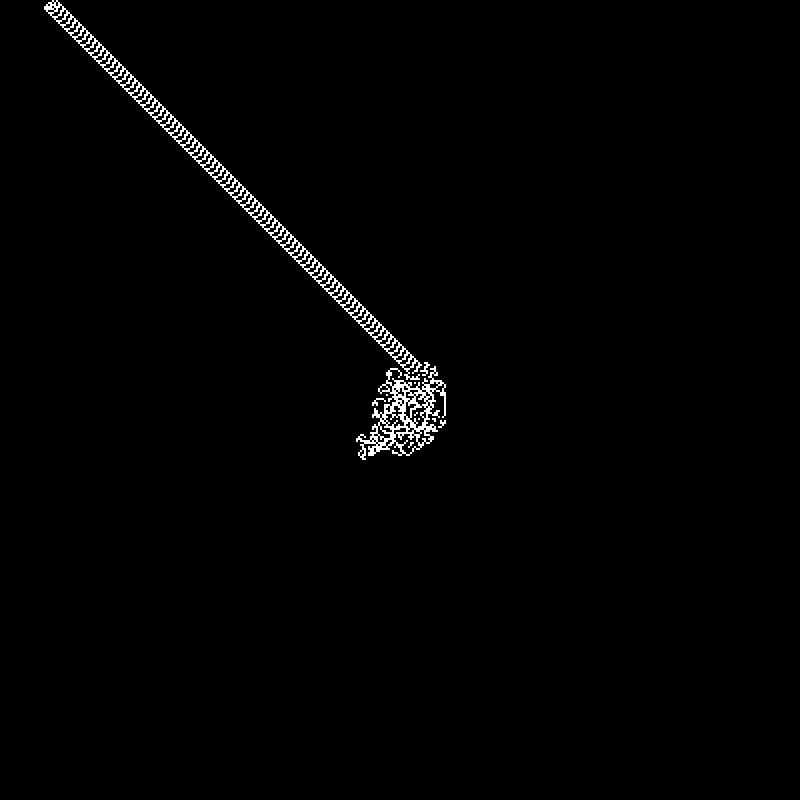

In [97]:
#sometimes the ant's journey is very long, its possible to stop the upper cell and visualize the result by running this cell at any time
#to boost the speed, increase the visualization step or completely disable visualization

#select image size and show
print("Please select the size to see the image. An example for starters - 800x800!\n")
img_size = list()

while True:
  try:
    img_size.append(abs(int(input("Enter the image size in pixels (lenght): "))))
    img_size.append(abs(int(input("Enter the image size in pixels (height): "))))
    break
  except ValueError:
    print("The provided input is not an integer! Try again.")

im = Image.fromarray(np.uint8(grid)).resize((img_size[0], img_size[1]), resample=Image.NEAREST)
display.display(im)

In [98]:
#image saving options
while True:
    ans = str(input("\nWould you like to save the image? (y/n): "))
    if ans in poss_ans:
      break
    else:
      print("Incorrect input - type 'y' for yes or 'n' for no.")

if ans == 'y':
  name = str(input("Please type the image name: "))

  im.save(name+".png")
  print("The image has been saved in your PATH as " + name + ".png")


Would you like to save the image? (y/n): y
Please type the image name: langtons_ant
The image has been saved in your PATH as langtons_ant.png
